In [1]:
## This is the FastAi Baseline for the Flower Recognition Competition on HackerEarth.You can tweak this Notebook or can used the Ideas for your own work.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/he_challenge_data/data"))

['sample_submission.csv', 'train', 'test', 'train.csv', 'test.csv']


### Need pretrainedmodels to load the pretrained Cedene models into fastai.
### https://github.com/Cadene/pretrained-models.pytorch

In [3]:
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=d3c9d93331057431e7db651f873858c78daf1b2d594e8329e769f6a826f3ddfc
  Stored in directory: /tmp/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [4]:
from torchvision.models import *
# import pretrainedmodels

from fastai import *
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
import fastai

from utils import *
import sys
import torch
fastai.__version__

'1.0.55'

In [5]:
torch.__version__

'1.1.0'

In [6]:
lis = os.listdir('../input/he_challenge_data/data/train')

In [7]:
sub = pd.read_csv('../input/he_challenge_data/data/sample_submission.csv')

In [8]:
sub.shape

(2009, 2)

In [9]:
bs=8

In [10]:
path = "../input/he_challenge_data/data/train"

In [11]:
## test filenames to be used to create final submission.
filenames = os.listdir('../input/he_challenge_data/data/test')

In [12]:
df = pd.read_csv('../input/he_challenge_data/data/train.csv')

In [13]:
df.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [14]:
# CenterCrop(32)
## These Transformation applied based upon my previous competition Experience.
## if you want to try other transformation check this link
## https://docs.fast.ai/vision.transform.html
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False,xtra_tfms=[cutout()])
tfms1 = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False,xtra_tfms=[cutout()])
data = (ImageList.from_csv(path, csv_name = '../train.csv', suffix='.jpg')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=400)
        .databunch(num_workers=0,bs=8))

data1 = (ImageList.from_csv(path, csv_name = '../train.csv', suffix='.jpg')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms1, size=400)
        .databunch(num_workers=0,bs=8))

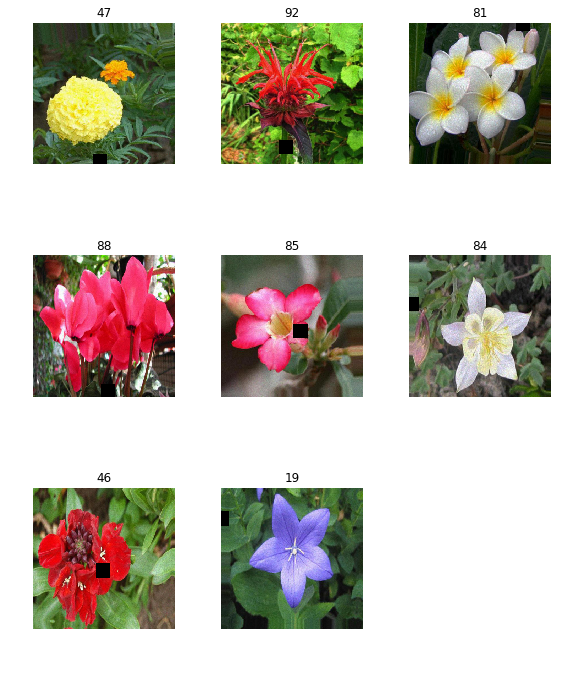

In [15]:
## to see the images in train with there labels
data.show_batch(rows=3, figsize=(8,10))

In [16]:
## print the target classes
print(data.classes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


In [17]:
## load the pretrained imagenet model
## you can try other models from this link
## https://docs.fast.ai/vision.models.html
learn = cnn_learner(data, models.densenet169, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /tmp/.cache/torch/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 57365526/57365526 [00:00<00:00, 107252317.66it/s]


In [18]:
## training with one cycle which used cyclic learning rate and learning rate annhelling
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.297522,0.058688,0.011057,0.988943,12:16


In [19]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [20]:
# learn.recorder.plot(suggestion=True)
# best_clf_lr = learn.recorder.min_grad_lr
# best_clf_lr

In [21]:
# learn.fit_one_cycle(2, max_lr=best_clf_lr)
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.130163,0.035497,0.007551,0.992449,13:20


In [22]:
## 2nd model

In [23]:
learn1 = cnn_learner(data1, models.densenet201, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /tmp/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 81131730/81131730 [00:04<00:00, 18512600.30it/s]


In [24]:
## training with one cycle which used cyclic learning rate and learning rate annhelling
learn1.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.278082,0.038192,0.008630,0.991370,13:21


In [25]:
learn1.unfreeze()
learn1.lr_find()
learn1.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.164890,0.016953,0.004045,0.995955,15:35


In [26]:
learn2 = cnn_learner(data1, models.resnet152, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
## training with one cycle which used cyclic learning rate and learning rate annhelling
learn2.fit_one_cycle(1)
learn2.unfreeze()
learn2.lr_find()
learn2.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /tmp/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:01<00:00, 145737971.91it/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.302070,0.068673,0.015912,0.984088,15:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.200832,0.040635,0.010787,0.989213,18:22


In [27]:
learn3 = cnn_learner(data, models.densenet121, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
## training with one cycle which used cyclic learning rate and learning rate annhelling
learn3.fit_one_cycle(1)
learn3.unfreeze()
learn3.lr_find()
learn3.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /tmp/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 110636148.30it/s]


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.343655,0.083445,0.020496,0.979504,10:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.154662,0.035081,0.007551,0.992449,11:31


In [28]:
## Applied Test Time Augmentation

In [29]:
preds,_ = learn.TTA(ds_type=DatasetType.Test)

In [30]:
preds1,_ = learn1.TTA(ds_type=DatasetType.Test)

In [31]:
preds2,_ = learn2.TTA(ds_type=DatasetType.Test)
preds3,_ = learn3.TTA(ds_type=DatasetType.Test)

In [32]:
## create the submission file 

In [33]:
labelled_preds = []
pred11 = preds + preds1 + preds2 + preds3
for pred in pred11:
    labelled_preds.append(int(np.argmax(pred))+1)

submission = pd.DataFrame(
    {'image_id': filenames,
     'category': labelled_preds,
    })
submission.to_csv('submission.csv',index=False)

In [34]:
submission.head()

,image_id,category
0,19634.jpg,8
1,20029.jpg,18
2,18611.jpg,82
3,19027.jpg,70
4,19894.jpg,54


In [35]:
submission['image_id'] = submission['image_id'].apply(lambda x:x.split('.')[0])

In [36]:
submission = submission.sort_values(by = ['image_id'], ascending = [True])

In [37]:
## To download the submission file without Commiting the kernel.

In [38]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "subm.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)

In [39]:
## This is the Fastai Baseline for the Flower Recognition Competition.If you like the work then plz Upvote the Kernel.
## https://www.hackerearth.com/challenges/competitive/garden-nerd